<a href="https://colab.research.google.com/github/MN1973/DataScienceProject/blob/main/6_Boosting_based_on_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,pydotplus
from IPython.display import Image,display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import _tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/Mandar/Project/datafile.gz")

In [ ]:
df.shape

(500000, 970)

In [ ]:
df.loc[df['nl_open'] < 0, 'nl_open'] = 0
df.loc[df['nl_open'] > 0, 'nl_open'] = 1

In [ ]:
df['nl_open'].value_counts()

0    374678
1    125322
Name: nl_open, dtype: int64

In [ ]:
df.head()

,login_freq_in_OND21,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,sender_name_others,download,nl_open,is_male,automobile,bfsi_business_loan,bfsi_credit_cards,bfsi_equity,bfsi_fixed_deposit,bfsi_health_ins,bfsi_motor_ins,bfsi_mutual_funds,bfsi_personal_loan,bfsi_term_ins,education,health,real_estate,CLASSIC,CORDOVA,MOBILEWEB_CONGO,MOBILEWEB,PCWEB,NG_APP,PCWEB_CONGO,POP,accupto2,acc3to5yrs,acc6to10yrs,acc11to15yrs,acc15+yrs,ab,abov,ac,...,visit,volatil,voucher,w,wait,waiver,wake,want,watch,wave,way,web,websit,welcom,well,whi,whole,wise,wish,within,without,wo,woman,women,wonder,wood,work,world,worri,worry,worth,would,write,x,yamuna,year,yeoor,yet,yr,zero
0,52,42,6,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,92,38,8,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24,29,5,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,51,30,5,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,92,37,6,0,1,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Y = df.iloc[:,[9]]
Y = df['nl_open']

In [ ]:
colname = df.columns[1]
print(colname)

sub_length


In [ ]:
#X = df.iloc[:, np.r_[1:2, 3:4, 7:8, 10:24, 32:970]]
X1 = df.iloc[:, np.r_[3:4, 7:8, 10:24, 32:37]]

In [ ]:
feature_cols = list(X1)
print(feature_cols)

['percentage_used', 'sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity', 'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins', 'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education', 'health', 'real_estate', 'accupto2', 'acc3to5yrs', 'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs']


In [ ]:
feature_names = ['percentage_used','sender_name_others', 'is_male', 'automobile', 'bfsi_business_loan','bfsi_credit_cards','bfsi_equity','bfsi_fixed_deposit','bfsi_health_ins','bfsi_motor_ins', 'bfsi_mutual_funds','bfsi_personal_loan','bfsi_term_ins','education','health','real_estate','accupto2','acc3to5yrs','acc6to10yrs','acc11to15yrs','acc15+yrs']
class_names = ['nl_open']

Boosting based on DT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y, test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(350000, 21)

In [ ]:
y_train.value_counts()

0    262351
1     87649
Name: nl_open, dtype: int64

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
X,y = make_classification(n_samples=100, n_features=21, n_informative=2, n_redundant=0, n_repeated=0, random_state=102)
clf = AdaBoostClassifier(n_estimators=4, random_state=0, algorithm='SAMME')
clf.fit(X, y)


AdaBoostClassifier(algorithm='SAMME', n_estimators=4, random_state=0)

In [ ]:
# for classification
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(X_train,y_train)
clf.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7268828571428572

#Hyperparameter tuning

In [ ]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [5,10,27,35],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10,25,30]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
CPU times: user 8.49 s, sys: 1.33 s, total: 9.82 s
Wall time: 9min 1s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 27, 35],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_


0.74968

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=27, min_samples_leaf=20, n_estimators=10,
                       n_jobs=-1, random_state=42)

DT based on RF Best

In [ ]:
clf_gini_rf = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                               max_depth=27, min_samples_leaf=20, min_samples_split=2 ,splitter='best')
clf_gini_rf.fit(X_train, y_train)
y_pred_g_rf=clf_gini_rf.predict(X_test)

In [ ]:
print ("Accuracy is ", accuracy_score(y_test,y_pred_g_rf)*100)


Accuracy is  74.87333333333333


In [ ]:
# print the confusion matrix
cm_gini_rf = metrics.confusion_matrix(y_test, y_pred_g_rf)
print(cm_gini_rf)

[[112162    165]
 [ 37525    148]]


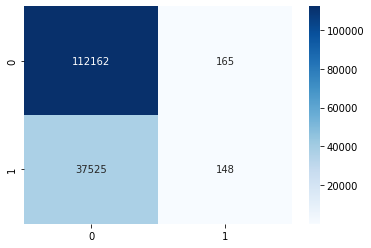

In [ ]:
import seaborn as sns
sns.heatmap(cm_gini_rf, annot=True, cmap='Blues',fmt='g')

In [ ]:
print(classification_report(y_test, y_pred_g_rf))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86    112327
           1       0.47      0.00      0.01     37673

    accuracy                           0.75    150000
   macro avg       0.61      0.50      0.43    150000
weighted avg       0.68      0.75      0.64    150000



Visualisation

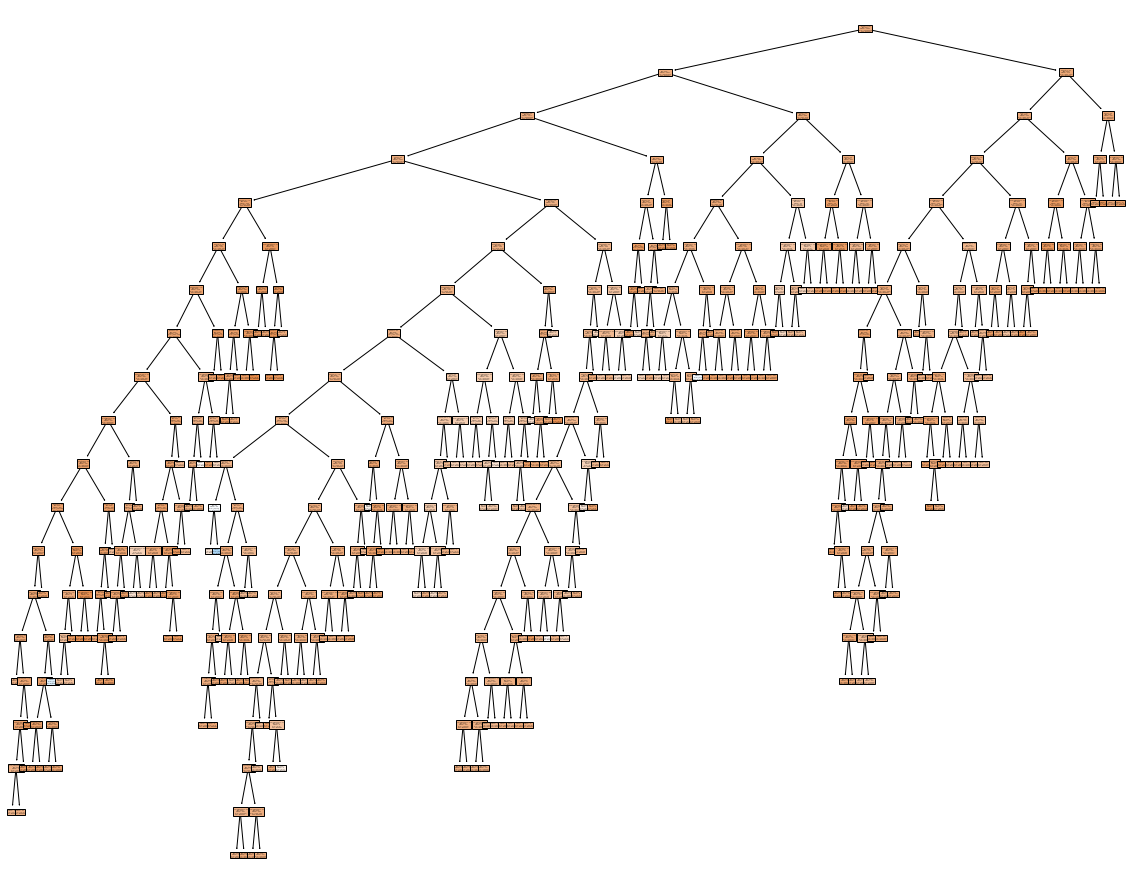

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,16))
plot_tree(rf_best.estimators_[4], feature_names = X1.columns,class_names=['NLOpened', "NL_Notopened"],filled=True);

In [ ]:
rf_best.feature_importances_


array([0.03668295, 0.03951015, 0.21386883, 0.02941133, 0.00466787,
       0.01209782, 0.00632319, 0.18709086, 0.01199609, 0.00872988,
       0.02029621, 0.01117411, 0.01389159, 0.06613756, 0.03289631,
       0.00971465, 0.05998519, 0.0579258 , 0.04930524, 0.06163549,
       0.0666589 ])

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)


,Varname,Imp
2,is_male,0.213869
7,bfsi_fixed_deposit,0.187091
20,acc15+yrs,0.066659
13,education,0.066138
19,acc11to15yrs,0.061635
16,accupto2,0.059985
17,acc3to5yrs,0.057926
18,acc6to10yrs,0.049305
1,sender_name_others,0.039510
0,percentage_used,0.036683
